<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/Bug/Dimensions01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import platform
import tensorflow
import keras
print("Platform:{}".format(platform.platform()))
print("Tensorflow version:{}".format(tensorflow.__version__))
print("Keras version:{}".format(keras.__version__))
import numpy as np
from IPython.display import Image

from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPool1D
from keras.utils import plot_model

Platform:Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version:2.9.2
Keras version:2.9.0


In [3]:
! if [ ! -f "dataset_Li.pkl" ]; then wget https://master.dl.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl ; else echo "Found previous downloaded data."; fi

--2022-11-09 23:21:46--  https://master.dl.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl
Resolving master.dl.sourceforge.net (master.dl.sourceforge.net)... 216.105.38.12
Connecting to master.dl.sourceforge.net (master.dl.sourceforge.net)|216.105.38.12|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl [following]
--2022-11-09 23:21:46--  https://downloads.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl [following]
--2022-11-09 23:21:46--  https://versaweb.dl.sourceforge.net/project/summer-re

In [23]:
# Data processing
import pickle
with open("dataset_Li.pkl", "rb") as f:
    data = pickle.load(f)
x_train, y_train = np.array(data['train'][0]), np.array(data['train'][1])
x_test, y_test = np.array(data['test'][0]), np.array(data['test'][1])
print(x_train.shape)
print(x_train[0:1, 0:2])

(16000, 1000, 4)
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]]]


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1000, 4)]         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 997, 32)           544       
                                                                 
 dense (Dense)               (None, 997, 64)           2112      
                                                                 
 output (Dense)              (None, 997, 4)            260       
                                                                 
Total params: 2,916
Trainable params: 2,916
Non-trainable params: 0
_________________________________________________________________
None


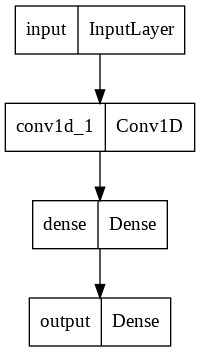

In [40]:
# 创建网络
input = Input(shape=(1000, 4), name='input')
conv1d_1 = Conv1D(32, kernel_size=4, activation='relu', name='conv1d_1')(input)
pool_1 = MaxPool1D(pool_size=2, name='pool_1')(conv1d_1)
conv1d_2 = Conv1D(16, kernel_size=4, activation='relu', name='conv1d_2')(pool_1)
pool_2 = MaxPool1D(pool_size=2, name='pool_2')(conv1d_2)
hidden1 = Dense(64,activation='relu',name='dense')(conv1d_1)
output = Dense(4,activation='softmax',name='output')(hidden1)

model = Model(inputs=input, outputs=output)

# 可视化
# 1、打印网络
print(model.summary())
# 2、展示网络结构
plot_model(model,to_file='multiple_inputs.png')
Image('multiple_inputs.png')

In [41]:
model.compile(optimizer='adam', metrics='acc', loss='mse')
model.fit(x_train, y_train, epochs=10, batch_size=4)

Epoch 1/10


ValueError: ignored